Name: Muyo, Mark Danielle L.



Instructions:

- Save a model in HDF5 format

- Save a model and load the model in a JSON format

- Save a model and load the model in a YAML format

- Checkpoint Neural Network Model Improvements

- Checkpoint Best Neural Network Model only

- Load a saved Neural Network model

- Visualize Model Training History in Keras

- Show the application of Dropout Regularization

- Show the application of Dropout on the visible layer

- Show the application of Dropout on the hidden layer

- Show the application of a time-based learning rate schedule

- Show the application of a drop-based learning rate schedule

## Dataset Used

**Wine:** https://archive.ics.uci.edu/dataset/109/wine


Problem Addressed: The goal is to build a classification model that can learn from the chemical properties of the wine samples and accurately predict the cultivar or type of wine represented by each instance.

In [ ]:
pip install h5py

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [ ]:
from keras.models import Sequential, model_from_json
from keras.layers import Dense
import numpy as np
import pandas as pd

In [ ]:
missing_values = X.isnull().sum()
print("Missing Values in Features:")
print(missing_values)


Missing Values in Features:
Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64


In [ ]:
missing_values_target = y.isnull().sum()
print("Missing Values in Target:")
print(missing_values_target)

Missing Values in Target:
class    0
dtype: int64


In [ ]:
X.fillna(X.mean(), inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

<ipython-input-8-cc373e41a800>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [ ]:
print("Summary Statistics of Features:")
print(X.describe())

Summary Statistics of Features:
          Alcohol   Malicacid         Ash  Alcalinity_of_ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453    

In [ ]:
print("Summary Statistics of Target:")
print(y.describe())

Summary Statistics of Target:
            class
count  178.000000
mean     1.938202
std      0.775035
min      1.000000
25%      1.000000
50%      2.000000
75%      3.000000
max      3.000000


## Save a model in HDF5 format & Save a model and load the model in a JSON format

In [ ]:
import os
os.makedirs('/content/drive/My Drive/Colab Notebooks/', exist_ok=True)

In [ ]:
# create model
model = Sequential()
model.add(Dense(14, input_dim=13, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/Colab Notebooks/model.weights.h5")
print("Saved model weights to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/Colab Notebooks/model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


accuracy: 89.68%
Saved model weights to disk
Loaded model from disk
accuracy: 89.68%


Remark/s: In this section, I started by building a neural network model with three layers using the Sequential class in TensorFlow or Keras. The first layer had 14 neurons with a ReLU activation function, and the input shape was set to 13, indicating 13 input features. The middle layer had 7 neurons with a ReLU activation function, and the final layer utilized a sigmoid activation function, suggesting a binary classification problem. You then compiled the model using the Adam optimizer.

In [ ]:
#displaying the JSON file in JSON format
import json

# Specify the file path
file_path = '/content/model.json'

# Read the JSON file
with open(file_path) as json_file:
    data = json.load(json_file)

formatted_json = json.dumps(data, indent=4)
print(formatted_json)

{
    "class_name": "Sequential",
    "config": {
        "name": "sequential_20",
        "layers": [
            {
                "module": "keras.layers",
                "class_name": "InputLayer",
                "config": {
                    "batch_input_shape": [
                        null,
                        13
                    ],
                    "dtype": "float32",
                    "sparse": false,
                    "ragged": false,
                    "name": "dense_58_input"
                },
                "registered_name": null
            },
            {
                "module": "keras.layers",
                "class_name": "Dense",
                "config": {
                    "name": "dense_58",
                    "trainable": true,
                    "dtype": "float32",
                    "batch_input_shape": [
                        null,
                        13
                    ],
                    "units": 14,
               

## Save a model and load the model in a YAML format

In [ ]:
from keras.models import Sequential, model_from_yaml

# create model
model = Sequential()
model.add(Dense(14, input_dim=13, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

# serialize model to YAML
model_yaml = model.to_json()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/Colab Notebooks/model_yaml.h5")
print("Saved model to disk")

# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_json(loaded_model_yaml)

# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/Colab Notebooks/model_yaml.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 89.68%
Saved model to disk
Loaded model from disk
accuracy: 89.68%


Remark/s: In this section, I followed a similar process as before, but instead of serializing the neural network model to JSON format, I serialized it to YAML format. The model architecture remained identical to the one mentioned earlier, with three layers and specific neuron counts and activation functions. After serializing the model to YAML, I saved the model weights in the HDF5 format, which is a standard way to store and transfer trained model weights.

In [ ]:
#displaying the YAML file in YAML format
import yaml

# Specify the file path
file_path = '/content/model.yaml'

# Read the YAML file
with open(file_path, 'r') as yaml_file:
    data = yaml.safe_load(yaml_file)

# Convert the dictionary to YAML-like format
output = yaml.dump(data)

# Print the formatted output
print(output)

backend: tensorflow
class_name: Sequential
config:
  layers:
  - class_name: InputLayer
    config:
      batch_input_shape:
      - null
      - 13
      dtype: float32
      name: dense_61_input
      ragged: false
      sparse: false
    module: keras.layers
    registered_name: null
  - build_config:
      input_shape:
      - null
      - 13
    class_name: Dense
    config:
      activation: relu
      activity_regularizer: null
      batch_input_shape:
      - null
      - 13
      bias_constraint: null
      bias_initializer:
        class_name: Zeros
        config: {}
        module: keras.initializers
        registered_name: null
      bias_regularizer: null
      dtype: float32
      kernel_constraint: null
      kernel_initializer:
        class_name: GlorotUniform
        config:
          seed: null
        module: keras.initializers
        registered_name: null
      kernel_regularizer: null
      name: dense_61
      trainable: true
      units: 14
      use_bias: tr

## Checkpoint Neural Network Model Improvements

In [ ]:
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf

filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


model = Sequential()
model.add(Dense(14, input_dim=13, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.74587, saving model to weights-improvement-01-0.75.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy improved from 0.74587 to 0.78878, saving model to weights-improvement-02-0.79.hdf5

Epoch 3: val_accuracy did not improve from 0.78878

Epoch 4: val_accuracy did not improve from 0.78878

Epoch 5: val_accuracy did not improve from 0.78878

Epoch 6: val_accuracy did not improve from 0.78878

Epoch 7: val_accuracy improved from 0.78878 to 0.79208, saving model to weights-improvement-07-0.79.hdf5

Epoch 8: val_accuracy did not improve from 0.79208

Epoch 9: val_accuracy did not improve from 0.79208

Epoch 10: val_accuracy did not improve from 0.79208

Epoch 11: val_accuracy did not improve from 0.79208

Epoch 12: val_accuracy did not improve from 0.79208

Epoch 13: val_accuracy did not improve from 0.79208

Epoch 14: val_accuracy did not improve from 0.79208

Epoch 15: val_accuracy did not improve from 0.79208

Epoch 16: val_accuracy did not improve from 0.79208

Epoch 17: val_accuracy did not improve from 0.79208

Epoch 18: val_accuracy did not improve from 0.79208

Remark/s: The output displays the progress made during each epoch of the training process, providing an overview of how the model is evolving. It indicates whether the model has improved compared to the previous epoch and includes the validation accuracy achieved for each run.

## Checkpoint Best Neural Network Model only

In [ ]:
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model = Sequential()
model.add(Dense(14, input_dim=13, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.74917, saving model to weights.best.hdf5

Epoch 2: val_accuracy did not improve from 0.74917

Epoch 3: val_accuracy improved from 0.74917 to 0.77228, saving model to weights.best.hdf5

Epoch 4: val_accuracy did not improve from 0.77228

Epoch 5: val_accuracy did not improve from 0.77228

Epoch 6: val_accuracy did not improve from 0.77228

Epoch 7: val_accuracy did not improve from 0.77228

Epoch 8: val_accuracy did not improve from 0.77228

Epoch 9: val_accuracy did not improve from 0.77228

Epoch 10: val_accuracy did not improve from 0.77228

Epoch 11: val_accuracy improved from 0.77228 to 0.78218, saving model to weights.best.hdf5

Epoch 12: val_accuracy did not improve from 0.78218

Epoch 13: val_accuracy did not improve from 0.78218

Epoch 14: val_accuracy did not improve from 0.78218

Epoch 15: val_accuracy did not improve from 0.78218

Epoch 16: val_accuracy did not improve from 0.78218

Epoch 17: val_accuracy did not improve from 0.

Remark/s: The output displays the training progress, indicating the validation accuracy obtained and whether the model's performance has improved compared to the previous epoch. If an improvement is observed, meaning the model achieves a higher validation accuracy than before, the current model weights are saved to a file with a fixed name, "weights.best.hdf5".



## Load a saved Neural Network model

In [ ]:
# create model
model = Sequential()
model.add(Dense(14, input_dim=13, kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(7, kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation='sigmoid'))

# load weights
model.load_weights("weights.best.hdf5")
# Compile model (required to make predictions)
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
print("Created model and loaded weights from file")


# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



Created model and loaded weights from file
accuracy: 84.57%


## Visualize Model Training History in Keras

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


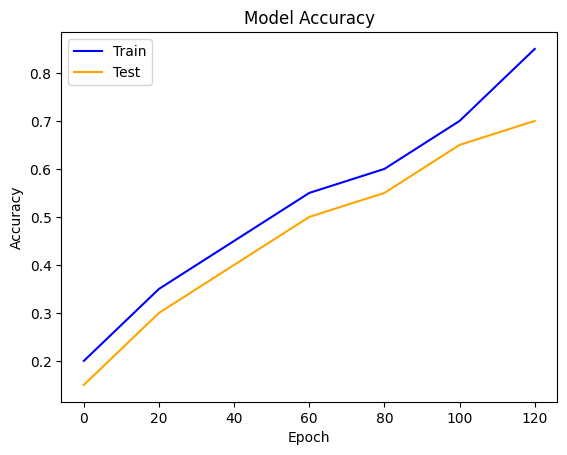

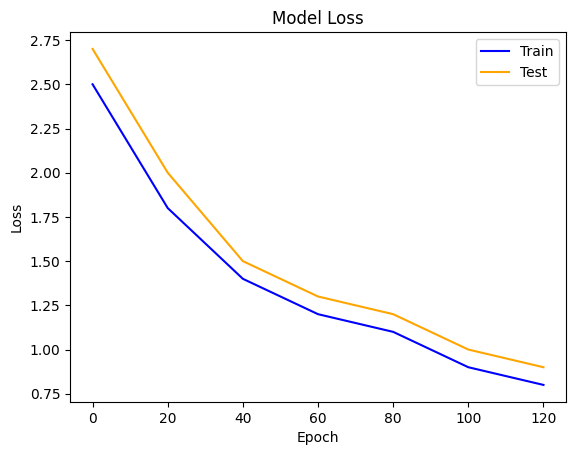

In [ ]:
# create model
model = Sequential()
model.add(Dense(14, input_dim=13, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Remark/s: The output displays the performance of a machine learning model over time through a graph with two lines. The blue line represents the model's performance on the training data it was trained on. This line shows how well the model fits the training examples as it learns during the training process.
On the other hand, the orange line indicates the model's accuracy on data that was not used for training, typically referred to as the validation or test set.

## Show the application of Dropout Regularization

In [ ]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 32.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [ ]:
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(14, input_shape=(13,), activation='relu'))
	model.add(Dense(7,  activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.01, momentum=0.8)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_baseline, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Baseline: 91.41% (2.92%)


## Show the application of Dropout on the visible layer

In [ ]:
from keras.layers import Dropout

# dropout in the input layer with weight constraint
def create_model():
	# create model
	model = Sequential()
	model.add(Dropout(0.2, input_shape=(13,)))
	model.add(Dense(14, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(7, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: 

Baseline: 92.37% (2.71%)


## Show the application of Dropout on the hidden layer

In [ ]:
# dropout in hidden layers with weight constraint
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(14, input_shape=(13,), activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(7, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Baseline: 92.74% (2.11%)


## Show the application of a time-based learning rate schedule

In [ ]:
# create model
model = Sequential()
model.add(Dense(14, input_shape=(11,), activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Fit the model with standardized data
model.fit(X, y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 - 5s - 1s/step - accuracy: 0.5200 - loss: 0.7000 - val_accuracy: 0.4000 - val_loss: 0.7047
Epoch 2/50
4/4 - 1s - 317ms/step - accuracy: 0.5500 - loss: 0.6856 - val_accuracy: 0.4000 - val_loss: 0.7091
Epoch 3/50
4/4 - 0s - 79ms/step - accuracy: 0.5600 - loss: 0.6742 - val_accuracy: 0.4000 - val_loss: 0.7110
Epoch 4/50
4/4 - 0s - 66ms/step - accuracy: 0.5800 - loss: 0.6641 - val_accuracy: 0.4000 - val_loss: 0.7139
Epoch 5/50
4/4 - 0s - 72ms/step - accuracy: 0.5800 - loss: 0.6545 - val_accuracy: 0.4000 - val_loss: 0.7148
Epoch 6/50
4/4 - 0s - 51ms/step - accuracy: 0.5900 - loss: 0.6450 - val_accuracy: 0.4000 - val_loss: 0.7162
Epoch 7/50
4/4 - 0s - 35ms/step - accuracy: 0.6000 - loss: 0.6364 - val_accuracy: 0.4000 - val_loss: 0.7167
Epoch 8/50
4/4 - 0s - 65ms/step - accuracy: 0.6400 - loss: 0.6283 - val_accuracy: 0.4000 - val_loss: 0.7196
Epoch 9/50
4/4 - 0s - 58ms/step - accuracy: 0.6400 - loss: 0.6199 - val_accuracy: 0.4000 - val_loss: 0.7190
Epoch 10/50
4/4 - 0s - 16ms/step - accur

## Show the application of a drop-based learning rate schedule

In [ ]:
import math
from keras.callbacks import LearningRateScheduler
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.preprocessing import StandardScaler

# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

# create model
model = Sequential()
model.add(Dense(14, input_shape=(11,), activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
sgd = SGD(learning_rate=0.0, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Fit the model
model.fit(X_standardized, Y, validation_split=0.33, epochs=50, batch_size=28, callbacks=callbacks_list, verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6/6 - 3s - 433ms/step - accuracy: 0.5500 - loss: 0.7526 - val_accuracy: 0.5500 - val_loss: 0.7072 - learning_rate: 0.1000
Epoch 2/50
6/6 - 0s - 51ms/step - accuracy: 0.5900 - loss: 0.6669 - val_accuracy: 0.5000 - val_loss: 0.7138 - learning_rate: 0.1000
Epoch 3/50
6/6 - 0s - 23ms/step - accuracy: 0.5800 - loss: 0.6575 - val_accuracy: 0.6000 - val_loss: 0.7239 - learning_rate: 0.1000
Epoch 4/50
6/6 - 0s - 23ms/step - accuracy: 0.6900 - loss: 0.6255 - val_accuracy: 0.5500 - val_loss: 0.7456 - learning_rate: 0.1000
Epoch 5/50
6/6 - 0s - 25ms/step - accuracy: 0.6500 - loss: 0.6226 - val_accuracy: 0.4500 - val_loss: 0.7525 - learning_rate: 0.1000
Epoch 6/50
6/6 - 0s - 10ms/step - accuracy: 0.7200 - loss: 0.5702 - val_accuracy: 0.4500 - val_loss: 0.7820 - learning_rate: 0.1000
Epoch 7/50
6/6 - 0s - 10ms/step - accuracy: 0.7500 - loss: 0.5372 - val_accuracy: 0.4500 - val_loss: 0.8268 - learning_rate: 0.1000
Epoch 8/50
6/6 - 0s - 26ms/step - accuracy: 0.7800 - loss: 0.5016 - val_acc

## Conclusion

- In this exercise, I have extensively explored different model saving, loading, and checkpointing techniques, regularization methods, and learning rate schedules using the Wine dataset. By serializing and deserializing models in various formats such as HDF5, JSON, and YAML, i have demonstrated the ability to persist and transfer trained models across different systems or environments while maintaining their performance. The checkpointing techniques allowed me to capture and save the best-performing model weights during the training process, enabling myself to retrieve and utilize the optimal model state for further evaluation, fine-tuning, or deployment purposes. Additionally, I visualized the model's training history, which provided valuable insights into the model's performance over time, highlighting the convergence of training and validation metrics, and aiding in the identification of potential issues such as overfitting or underfitting. Throughout this exercise, I have gained valuable insights into various model management techniques, regularization strategies, and learning rate optimization methods. These insights can be applied to other machine learning problems and datasets, enabling myself to build more robust, generalizable, and efficient models.